<h2><center>Author: Ricardo Manzano Sanchez.</center></h2>
<h2><center>Email: ricardoamsrams@gmail.com</center></h2>

The goal of the present report is to understand how we can reduce the dimensionality of a dataset projecting the original datapoints into a space where the maximun variance is guaranteed and the covariance is minima. To validate this approach has been used a dataset called Communities and Crime. This dataset is composed of 122 predictive attributes, 5 non-predictive attributes and 1 label. The dataset can be found in http://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.names.
As it is exposed in the description of the dataset each attribute is normalized between 0 and 1. Therefore, it is not necessary to normalized the data again.
In the present report will be used the numpy, matplotlib, and csv libraries.
In addition, it will be used eigenvectors decomposition to reduce the dimensionality of the data. It is not used singular value decomposition.



In this section, the dataset is imported to phyton using Pandas library. Due to the fact that the data is imported into a dataframe, it is necessary to change it to matrix to work with the library numpy. 

In the next lines of code are imported the libraries which will be used in the next report

In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
from numpy import diag
from numpy import dot
from numpy.linalg import inv
from numpy import array
from numpy.linalg import eig
import numpy as num


The next lines of code import the dataset communities.data.txt into phyton using Pandas. In addition, it is selected predictive attributes to do the analysis while the label and non predictive attributes are excluded. With the function iloc is possible to select the attributes of interest

In [2]:

path = 'C:\\RICARDO\\communities.data.txt'
a=pd.read_csv(path,delimiter=",")
print(a)
b=a.iloc[:,5:127]
c=a.iloc[:,5:127]
#print(b)
#print(c)


       8    ?    ?.1            Lakewoodcity   1  0.19  0.33  0.02   0.9  \
0     53    ?      ?             Tukwilacity   1  0.00  0.16  0.12  0.74   
1     24    ?      ?            Aberdeentown   1  0.00  0.42  0.49  0.56   
2     34    5  81440     Willingborotownship   1  0.04  0.77  1.00  0.08   
3     42   95   6096       Bethlehemtownship   1  0.01  0.55  0.02  0.95   
4      6    ?      ?       SouthPasadenacity   1  0.02  0.28  0.06  0.54   
5     44    7  41500             Lincolntown   1  0.01  0.39  0.00  0.98   
6      6    ?      ?               Selmacity   1  0.01  0.74  0.03  0.46   
7     21    ?      ?           Hendersoncity   1  0.03  0.34  0.20  0.84   
8     29    ?      ?             Claytoncity   1  0.01  0.40  0.06  0.87   
9      6    ?      ?            DalyCitycity   1  0.13  0.71  0.15  0.07   
10    36    ?      ?  RockvilleCentrevillage   1  0.02  0.46  0.08  0.91   
11    25   21  44105             Needhamtown   1  0.03  0.47  0.01  0.96   
12    55   8

Due to the fact that there is missed data represented by __`?`__, it is necessary to replace this data with the mean of each column. To do that, at the beginning in a copy of the original dataset stored in the variable __`c`__, it is replaced all of the values of __`?`__ with 0. With the matrix __`c`__ is calculated the mean for each attribute. Finally, in the matrix __`b`__ is replace each __`?`__ with the corresponding mean in each attribute 

In [3]:

c=c.replace('?',0)
c=c.convert_objects(convert_numeric=True)
print(c)
#c.to_csv('file_name.csv', sep=',')
for m in range(122):
        d=c.iloc[:,m].mean()
        b.iloc[:,m]=b.iloc[:,m].replace('?', d)
b=b.convert_objects(convert_numeric=True)

#b.to_csv('file_name2.csv', sep=',')
print(b)

c:\users\ramanzan\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\ramanzan\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


      0.19  0.33  0.02   0.9  0.12  0.17  0.34  0.47  0.29  0.32   ...    \
0     0.00  0.16  0.12  0.74  0.45  0.07  0.26  0.59  0.35  0.27   ...     
1     0.00  0.42  0.49  0.56  0.17  0.04  0.39  0.47  0.28  0.32   ...     
2     0.04  0.77  1.00  0.08  0.12  0.10  0.51  0.50  0.34  0.21   ...     
3     0.01  0.55  0.02  0.95  0.09  0.05  0.38  0.38  0.23  0.36   ...     
4     0.02  0.28  0.06  0.54  1.00  0.25  0.31  0.48  0.27  0.37   ...     
5     0.01  0.39  0.00  0.98  0.06  0.02  0.30  0.37  0.23  0.60   ...     
6     0.01  0.74  0.03  0.46  0.20  1.00  0.52  0.55  0.36  0.35   ...     
7     0.03  0.34  0.20  0.84  0.02  0.00  0.38  0.45  0.28  0.48   ...     
8     0.01  0.40  0.06  0.87  0.30  0.03  0.90  0.82  0.80  0.39   ...     
9     0.13  0.71  0.15  0.07  1.00  0.41  0.40  0.52  0.35  0.33   ...     
10    0.02  0.46  0.08  0.91  0.07  0.10  0.34  0.36  0.22  0.57   ...     
11    0.03  0.47  0.01  0.96  0.13  0.02  0.29  0.32  0.20  0.52   ...     
12    0.01  

In the next step the dataframe is converted into a matrix.

In [4]:
ric = b.as_matrix()
print(ric)
#num.savetxt("homework3.csv", ric, delimiter=",")

[[0.         0.16       0.12       ... 0.07024586 0.         0.03115404]
 [0.         0.42       0.49       ... 0.07024586 0.         0.03115404]
 [0.04       0.77       1.         ... 0.07024586 0.         0.03115404]
 ...
 [0.16       0.37       0.25       ... 0.         0.91       0.28      ]
 [0.08       0.51       0.06       ... 0.         0.22       0.18      ]
 [0.2        0.78       0.14       ... 0.5        1.         0.13      ]]


c:\users\ramanzan\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


PCA

To calculate the eigenvectors and eigenvalues is necessary to follow the next procedure:

1- Substract the mean of each of the attributes with the goal to have each attribute with mean 0.


In [5]:
meanall=num.mean(ric,axis=0)
print("\t")
print("Mean of each attribute")
print(meanall)
dataminusmean=ric-meanall
print("\t")
print("Main matrix minus mean in each attribute")
print(dataminusmean)
meanverification=num.mean(dataminusmean,axis=0)
print("\t")
print("New mean of each attribute")
print(meanverification)
#num.savetxt("homework3datminusmea.csv", meanverification, delimiter=",")

	
Mean of each attribute
[0.05752634 0.46346212 0.17970898 0.75364275 0.15369794 0.14400903
 0.42425991 0.49387858 0.336287   0.42321626 0.06400401 0.69611641
 0.36111892 0.55807326 0.29154541 0.49563472 0.47122428 0.31786252
 0.47927245 0.37566984 0.35022579 0.36803813 0.29108379 0.20347215
 0.32238334 0.28470374 0.38626693 0.05549423 0.30308078 0.3159157
 0.38343201 0.36161565 0.36357752 0.50098344 0.39646764 0.44061214
 0.39129453 0.44129955 0.46113397 0.43447065 0.48743603 0.49414451
 0.48781736 0.61094832 0.62067235 0.66405921 0.58289513 0.50132965
 0.52657301 0.03629202 0.25005018 0.03006021 0.32025088 0.36066734
 0.39909182 0.42789764 0.18141997 0.18218264 0.18482689 0.18293026
 0.78585048 0.15063221 0.26767185 0.25195183 0.46216759 0.49448068
 0.40415956 0.56260411 0.18631209 0.49517812 0.3146011  0.07674862
 0.71955344 0.54870045 0.20460612 0.43342198 0.49409935 0.26454089
 0.24315103 0.26471149 0.26352735 0.26898645 0.3463723  0.37246864
 0.42298545 0.38412444 0.49018063 0.44

2.- Calculate the covariance matrix for a sample with bias correction with the following formula
$$cov=\frac{1}{N-1}X.X^T$$

In [6]:
covariancematrix=((dataminusmean).T.dot(dataminusmean))/(dataminusmean.shape[0]-1)


In [7]:
print(covariancematrix)
#num.savetxt("h3covariancematrix.csv", covariancematrix, delimiter=",")

[[ 0.01610437 -0.00095042  0.00744978 ...  0.01173218  0.01421542
   0.00420587]
 [-0.00095042  0.02680769 -0.00279663 ... -0.00228946 -0.00369969
  -0.00160399]
 [ 0.00744978 -0.00279663  0.06425232 ...  0.00981575  0.01591079
   0.00451098]
 ...
 [ 0.01173218 -0.00228946  0.00981575 ...  0.04465555  0.02862227
   0.00792271]
 [ 0.01421542 -0.00369969  0.01591079 ...  0.02862227  0.05776103
   0.01324961]
 [ 0.00420587 -0.00160399  0.00451098 ...  0.00792271  0.01324961
   0.00794263]]


To calculate the eigenvalues and eigenvector is used a function from numpy

In [8]:
eigenvalues, eigenvectors = num.linalg.eig(covariancematrix)#eigenvectors and eigenvalues
print('Eigenvectors \n%s' %eigenvectors)
print('Eigenvalues \n%s' %eigenvalues)
#num.savetxt("h3eigenvalues.csv", eigenvalues, delimiter=",")
#num.savetxt("h3eigenvectors.csv", eigenvectors, delimiter=",")

Eigenvectors 
[[ 2.99669727e-02  5.91161519e-02 -8.40685415e-02 ...  7.05402030e-05
  -3.38704410e-04  5.39292665e-04]
 [-8.79043712e-03  5.45910898e-02  1.48597932e-01 ...  1.02793369e-02
  -2.30676891e-02  7.44761625e-02]
 [ 1.33517175e-01  2.48249153e-02 -9.65109328e-02 ... -2.83898230e-04
   8.31935546e-03  1.52354746e-03]
 ...
 [ 4.10849354e-02  8.04879500e-02 -1.47238078e-01 ...  4.69353025e-04
   2.42724570e-03 -1.53750996e-03]
 [ 6.62956809e-02  1.19044483e-01 -2.24076512e-01 ...  7.36652248e-03
   6.38868903e-02  1.14770767e-02]
 [ 1.66271466e-02  3.67751433e-02 -6.52205518e-02 ... -1.24931679e-03
  -1.45418933e-01 -2.78226518e-02]]
Eigenvalues 
[1.09090412e+00 8.07981092e-01 4.39437703e-01 2.96554664e-01
 2.25623496e-01 1.61843585e-01 1.58347784e-01 1.30659383e-01
 1.06808167e-01 7.88848969e-02 7.66794712e-02 5.69107930e-02
 5.57323557e-02 5.31730061e-02 4.76602420e-02 3.97990976e-02
 3.33219145e-02 2.99613027e-02 2.83081544e-02 2.70894835e-02
 2.58313884e-02 2.52554619e-02 2

To select the first 20 eigenvalues is used the next function

In [9]:
eigenvalues20=eigenvalues[0:19]
print(eigenvalues20)


[1.09090412 0.80798109 0.4394377  0.29655466 0.2256235  0.16184359
 0.15834778 0.13065938 0.10680817 0.0788849  0.07667947 0.05691079
 0.05573236 0.05317301 0.04766024 0.0397991  0.03332191 0.0299613
 0.02830815]


It is calculated which is the percentage that each eigenvalue contributes to the PCA

In [10]:
total = sum(eigenvalues)
variance=num.zeros(shape=(20))
for i in range(0,20):
    variance[i]=(eigenvalues[i]/total)*100

print(variance)


[24.33396061 18.02301382  9.80219942  6.61501717  5.03281008  3.61012059
  3.53214244  2.91451852  2.38248776  1.75962482  1.71043009  1.26946536
  1.24317887  1.18608942  1.06312042  0.88776791  0.74328636  0.66832377
  0.63144826  0.60426431]


It is plotted all the principal components in a bar to see which are the components that more contribute

<BarContainer object of 20 artists>

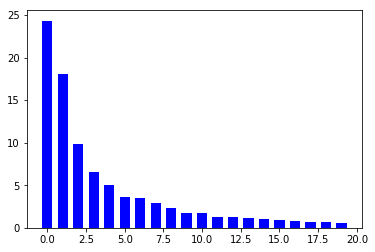

In [11]:
N = len(variance)
x = range(N)
width = 1/1.5
plt.bar(x, variance, width, color="blue")

As we can see in the figure above the first component and the second component contribute more of the 40 percent, but this percentage is not enough to construct the model. I suggest to select the first 15 components.

To plot all the datapoints into the 2 principal components, it is necessary to project all the datapoints into these two vectors as follows

In [12]:
syl=eigenvectors[:,0]
wa=eigenvectors[:,1]

In [13]:
newtransformation=ric.dot(syl)
print(newtransformation)
print("\t")
newtransformation1=ric.dot(wa)
print(newtransformation1)

[-0.6112455  -0.25713104 -1.3688155  ...  0.05983908 -1.03496136
 -0.04332964]
	
[1.2434331  0.38812673 1.30181446 ... 1.63995556 2.22409851 3.30179573]


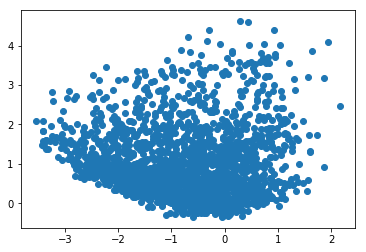

In [14]:
newtransformation.shape

plt.scatter(newtransformation,newtransformation1)
